In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
levels_fyi=pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [3]:
levels_fyi

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
levels_fyi.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

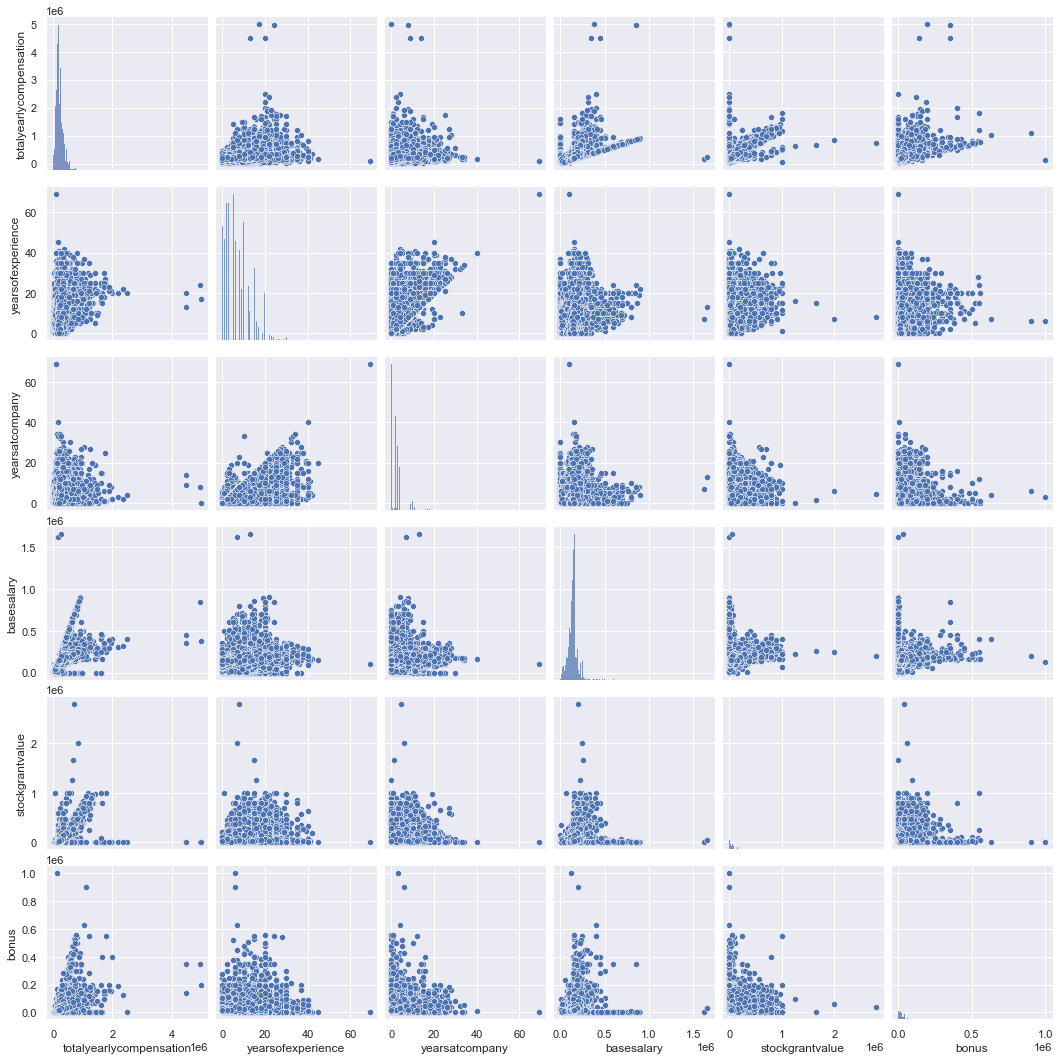

In [63]:
sns.pairplot(
    levels_fyi[['company','level','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany',
                'basesalary','stockgrantvalue','bonus','Race','Education']]
    
)

<AxesSubplot:>

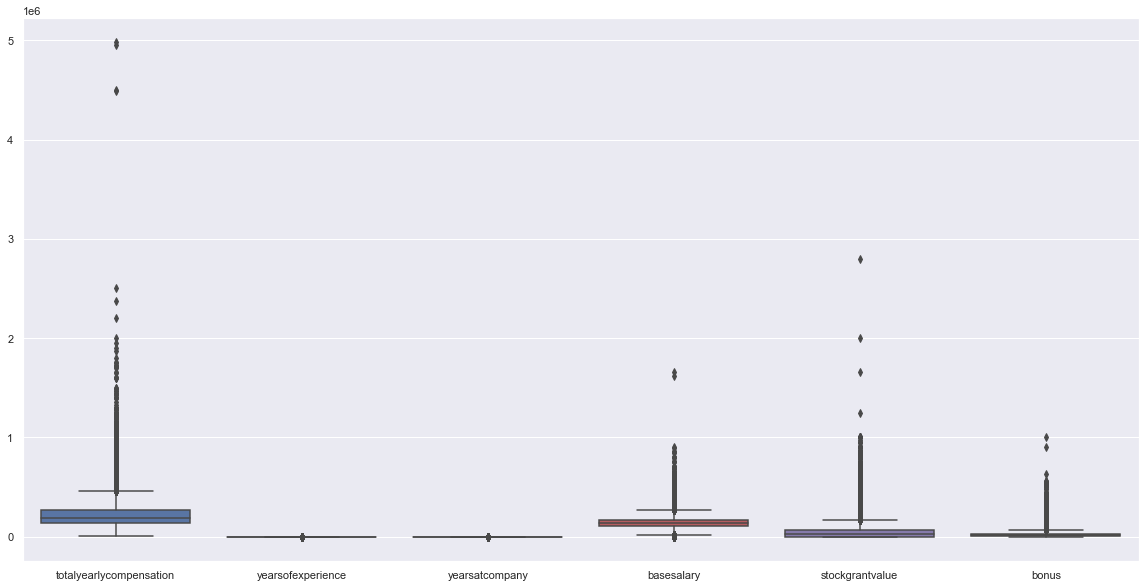

In [71]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(data=levels_fyi[['totalyearlycompensation','yearsofexperience','yearsatcompany',
                'basesalary','stockgrantvalue','bonus']])

In [7]:
len(levels_fyi['company'].unique())

1632

In [8]:
dd=(levels_fyi['company'].value_counts() > 10)
dd.to_csv('dd.csv')

In [9]:
levels_fyi.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [10]:
levels_fyi.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [11]:
cleaned_data=levels_fyi.drop(['timestamp','dmaid','cityid','gender','Race_White','Race_Asian','Race_Two_Or_More','Race_Black',
                             'Race_Hispanic','Race','rowNumber','otherdetails'], axis = 1)

In [12]:
split_data = cleaned_data["location"].str.split(",")
data = split_data.to_list()
names = ["city","state","country","area"]
city_state_split = pd.DataFrame(data, columns=names)
city_state_split

cleaned_data['city']=city_state_split['city']
cleaned_data['state']=city_state_split['state']
cleaned_data['country']=city_state_split['country']
cleaned_data['area']=city_state_split['area']
cleaned_data=cleaned_data.drop(['location'], axis = 1)
cleaned_data['state'].str.strip()
cleaned_data['state'] = cleaned_data['state'].str.replace(r'\s+', ' ')
cleaned_data['state'] = cleaned_data['state'] .str.strip().str.lower()


In [13]:
arr=[]

def overview_stock(val):
    if (val == None):

        arr.append(False) 
    else:

        arr.append(None)


In [14]:
count=0
count_val = 0
for i in cleaned_data['country']:
    value =overview_stock(i)



In [15]:
cleaned_data['country']=arr

In [16]:
cleaned_data = cleaned_data.dropna(axis=0, subset=['country'])

In [17]:
cleaned_data=cleaned_data.drop(['country','area','Education'], axis = 1)

In [18]:
cleaned_data.isnull().sum()

company                      3
level                       93
title                        0
totalyearlycompensation      0
yearsofexperience            0
yearsatcompany               0
tag                        817
basesalary                   0
stockgrantvalue              0
bonus                        0
Masters_Degree               0
Bachelors_Degree             0
Doctorate_Degree             0
Highschool                   0
Some_College                 0
city                         0
state                        0
dtype: int64

In [19]:
cleaned_data

,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city,state
0,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,107000.0,20000.0,10000.0,0,0,0,0,0,Redwood City,ca
1,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,0.0,0.0,0.0,0,0,0,0,0,San Francisco,ca
2,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,155000.0,0.0,0.0,0,0,0,0,0,Seattle,wa
3,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,157000.0,180000.0,35000.0,0,0,0,0,0,Sunnyvale,ca
4,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,0.0,0.0,0.0,0,0,0,0,0,Mountain View,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,T4,Software Engineer,327000,10.0,1.0,Distributed Systems (Back-End),155000.0,150000.0,22000.0,0,0,0,0,0,Seattle,wa
62638,Microsoft,62,Software Engineer,237000,2.0,2.0,Full Stack,146900.0,73200.0,16000.0,0,0,0,0,0,Redmond,wa
62639,MSFT,63,Software Engineer,220000,14.0,12.0,Full Stack,157000.0,25000.0,20000.0,0,0,0,0,0,Seattle,wa
62640,Salesforce,Lead MTS,Software Engineer,280000,8.0,4.0,iOS,194688.0,57000.0,29000.0,0,0,0,0,0,San Francisco,ca


In [20]:
states_abbreviation=pd.read_csv("latlon.csv")
states_abbreviation['state'] = states_abbreviation['state'].str.replace(r'\s+', ' ')
states_abbreviation['state'] = states_abbreviation['state'] .str.strip().str.lower()


In [21]:
mergred_states_abbreviation = pd.merge(states_abbreviation,cleaned_data,how='inner',on=['state','state'])
mergred_states_abbreviation

,state,latitude,longitude,name,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city
0,al,32.318231,-86.902298,Alabama,Saic,Software engineer,Software Engineer,84000,3.0,2.0,Full Stack,0.0,0.0,0.0,0,0,0,0,0,Huntsville
1,al,32.318231,-86.902298,Alabama,SAIC,1,Software Engineer,70000,2.0,2.0,Full Stack,70000.0,0.0,0.0,0,0,0,0,0,Huntsville
2,al,32.318231,-86.902298,Alabama,Raytheon Technologies,G7,Software Engineer,112000,5.0,3.0,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0,Huntsville
3,al,32.318231,-86.902298,Alabama,SAIC,Software Engineer Associate,Software Engineer,71000,2.0,2.0,Full Stack,71000.0,0.0,0.0,0,0,0,0,0,Huntsville
4,al,32.318231,-86.902298,Alabama,Northrop Grumman,Level2,Software Engineer,84000,2.0,2.0,Full Stack,84000.0,0.0,0.0,0,0,0,0,0,Huntsville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52833,wv,38.597626,-80.454903,West Virginia,Procter & Gamble,Entry Level,Mechanical Engineer,80000,0.0,0.0,Manufacturing Engineering,78000.0,0.0,2000.0,0,1,0,0,0,Martinsburg
52834,wv,38.597626,-80.454903,West Virginia,Procter & Gamble,entry level product supply,Mechanical Engineer,80000,0.0,0.0,Security,80000.0,0.0,2000.0,0,1,0,0,0,Inwood
52835,wv,38.597626,-80.454903,West Virginia,Google,L5,Software Engineer,235000,11.0,0.0,Site Reliability (SRE),163000.0,48000.0,25000.0,0,1,0,0,0,London
52836,wv,38.597626,-80.454903,West Virginia,Infor,L1,Software Engineer,65000,1.0,1.0,Testing (SDET),65000.0,0.0,0.0,0,0,0,1,0,Charleston


In [22]:
waether_data=pd.read_excel("weather_data.xlsx")


In [23]:
mergred_waether_data = pd.merge(waether_data,mergred_states_abbreviation,how='inner',on=['name','name'])
mergred_waether_data

,name,Avg °F,Avg °C,Rank,state,latitude,longitude,company,level,title,...,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city
0,Alabama,62.8,17.1,7,al,32.318231,-86.902298,Saic,Software engineer,Software Engineer,...,Full Stack,0.0,0.0,0.0,0,0,0,0,0,Huntsville
1,Alabama,62.8,17.1,7,al,32.318231,-86.902298,SAIC,1,Software Engineer,...,Full Stack,70000.0,0.0,0.0,0,0,0,0,0,Huntsville
2,Alabama,62.8,17.1,7,al,32.318231,-86.902298,Raytheon Technologies,G7,Software Engineer,...,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0,Huntsville
3,Alabama,62.8,17.1,7,al,32.318231,-86.902298,SAIC,Software Engineer Associate,Software Engineer,...,Full Stack,71000.0,0.0,0.0,0,0,0,0,0,Huntsville
4,Alabama,62.8,17.1,7,al,32.318231,-86.902298,Northrop Grumman,Level2,Software Engineer,...,Full Stack,84000.0,0.0,0.0,0,0,0,0,0,Huntsville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,Epic Systems,Software Developer,Software Engineer,...,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0,Madison
52242,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,Epic Systems,Software Developer,Software Engineer,...,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0,Madison
52243,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,Epic Systems,Entry,Software Engineer,...,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0,Verona
52244,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,Microsoft,62,Software Engineer,...,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0,Hilbert


In [24]:
livalbility_score=pd.read_excel("livalbility_score.xlsx")

In [25]:
mergred_livalbility_score = pd.merge(livalbility_score,mergred_waether_data,how='inner',on=['name','name'])
mergred_livalbility_score

,overall rank,name,total score,affordability,economy,education and health,quality of life,safety,Avg °F,Avg °C,...,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city
0,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,Web Development (Front-End),125000.0,20000.0,15000.0,0,0,0,0,0,Hoboken
1,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,Cloud,205000.0,0.0,30000.0,0,0,0,0,0,Newark
2,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,Full Stack,96000.0,0.0,8000.0,0,0,0,0,0,Jersey City
3,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,Full Stack,200000.0,66000.0,50000.0,0,0,0,0,0,Roseland
4,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,Android,95000.0,0.0,0.0,0,0,0,0,0,Whippany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,Full Stack,105000.0,0.0,5000.0,0,1,0,0,0,Albuquerque
52242,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,Full Stack,124000.0,0.0,3000.0,0,0,0,0,0,Albuquerque
52243,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,Full Stack,128000.0,0.0,2000.0,1,0,0,0,0,Albuquerque
52244,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,Web Development (Front-End),127000.0,0.0,5000.0,0,0,0,0,0,Albuquerque


In [26]:
tech_employment_count=pd.read_excel("tech_employment_count.xlsx")

In [27]:
mergred_tech_employment_count = pd.merge(tech_employment_count,mergred_livalbility_score,how='inner',on=['name','name'])
mergred_tech_employment_count

,name,Contribution to GDP in 2016 (in billions),Absolute change in GDP since 2014 (in billions),Percent change in GDP since 2014,Employment,Absolute change in employment since 2014,Percent change in employment since 2014,overall rank,total score,affordability,...,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city
0,Alabama,3.64,0.35,0.105,26964.0,1723.0,0.068,41,47.52,1,...,Full Stack,0.0,0.0,0.0,0,0,0,0,0,Huntsville
1,Alabama,3.64,0.35,0.105,26964.0,1723.0,0.068,41,47.52,1,...,Full Stack,70000.0,0.0,0.0,0,0,0,0,0,Huntsville
2,Alabama,3.64,0.35,0.105,26964.0,1723.0,0.068,41,47.52,1,...,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0,Huntsville
3,Alabama,3.64,0.35,0.105,26964.0,1723.0,0.068,41,47.52,1,...,Full Stack,71000.0,0.0,0.0,0,0,0,0,0,Huntsville
4,Alabama,3.64,0.35,0.105,26964.0,1723.0,0.068,41,47.52,1,...,Full Stack,84000.0,0.0,0.0,0,0,0,0,0,Huntsville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,7.48,1.77,0.310,45014.0,5745.0,0.146,6,60.94,32,...,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0,Madison
52242,Wisconsin,7.48,1.77,0.310,45014.0,5745.0,0.146,6,60.94,32,...,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0,Madison
52243,Wisconsin,7.48,1.77,0.310,45014.0,5745.0,0.146,6,60.94,32,...,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0,Verona
52244,Wisconsin,7.48,1.77,0.310,45014.0,5745.0,0.146,6,60.94,32,...,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0,Hilbert


In [28]:
population=pd.read_excel("population.xlsx")

In [29]:
mergred_population = pd.merge(population,mergred_tech_employment_count,how='inner',on=['name','name'])
mergred_population

,name,Unnamed: 1,population_2020,Unnamed: 3,Contribution to GDP in 2016 (in billions),Absolute change in GDP since 2014 (in billions),Percent change in GDP since 2014,Employment,Absolute change in employment since 2014,Percent change in employment since 2014,...,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,city
0,Alabama,NaN,5024279,NaN,3.64,0.35,0.105,26964.0,1723.0,0.068,...,Full Stack,0.0,0.0,0.0,0,0,0,0,0,Huntsville
1,Alabama,NaN,5024279,NaN,3.64,0.35,0.105,26964.0,1723.0,0.068,...,Full Stack,70000.0,0.0,0.0,0,0,0,0,0,Huntsville
2,Alabama,NaN,5024279,NaN,3.64,0.35,0.105,26964.0,1723.0,0.068,...,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0,Huntsville
3,Alabama,NaN,5024279,NaN,3.64,0.35,0.105,26964.0,1723.0,0.068,...,Full Stack,71000.0,0.0,0.0,0,0,0,0,0,Huntsville
4,Alabama,NaN,5024279,NaN,3.64,0.35,0.105,26964.0,1723.0,0.068,...,Full Stack,84000.0,0.0,0.0,0,0,0,0,0,Huntsville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,NaN,5893718,NaN,7.48,1.77,0.310,45014.0,5745.0,0.146,...,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0,Madison
52242,Wisconsin,NaN,5893718,NaN,7.48,1.77,0.310,45014.0,5745.0,0.146,...,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0,Madison
52243,Wisconsin,NaN,5893718,NaN,7.48,1.77,0.310,45014.0,5745.0,0.146,...,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0,Verona
52244,Wisconsin,NaN,5893718,NaN,7.48,1.77,0.310,45014.0,5745.0,0.146,...,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0,Hilbert


In [30]:
mergred_population.isnull().sum()

name                                                   0
Unnamed: 1                                         52246
population_2020                                        0
Unnamed: 3                                         52246
Contribution to GDP in 2016 (in billions)              0
Absolute change in GDP since 2014 (in billions)        0
Percent change in GDP since 2014                       0
Employment                                             0
Absolute change in employment since 2014               0
Percent change in employment since 2014                0
overall rank                                           0
total score                                            0
affordability                                          0
economy                                                0
education and health                                   0
quality of life                                       10
safety                                                10
Avg °F                         

In [31]:
data245_cleaneddata=mergred_population.drop(['Unnamed: 1','Unnamed: 3','Contribution to GDP in 2016 (in billions)',
                                                        'Absolute change in GDP since 2014 (in billions)','Percent change in GDP since 2014',
                                                       'Absolute change in employment since 2014','Percent change in employment since 2014',
                                                       'Avg °F',
                                                       'Avg °C','state','latitude','longitude','city','overall rank','total score'], axis = 1)

data245_cleaneddata

,name,population_2020,Employment,affordability,economy,education and health,quality of life,safety,Rank,company,...,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
0,Alabama,5024279,26964.0,1,38,43,41.0,41.0,7,Saic,...,2.0,Full Stack,0.0,0.0,0.0,0,0,0,0,0
1,Alabama,5024279,26964.0,1,38,43,41.0,41.0,7,SAIC,...,2.0,Full Stack,70000.0,0.0,0.0,0,0,0,0,0
2,Alabama,5024279,26964.0,1,38,43,41.0,41.0,7,Raytheon Technologies,...,3.0,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0
3,Alabama,5024279,26964.0,1,38,43,41.0,41.0,7,SAIC,...,2.0,Full Stack,71000.0,0.0,0.0,0,0,0,0,0
4,Alabama,5024279,26964.0,1,38,43,41.0,41.0,7,Northrop Grumman,...,2.0,Full Stack,84000.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,5893718,45014.0,32,20,10,8.0,9.0,43,Epic Systems,...,0.0,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0
52242,Wisconsin,5893718,45014.0,32,20,10,8.0,9.0,43,Epic Systems,...,2.0,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0
52243,Wisconsin,5893718,45014.0,32,20,10,8.0,9.0,43,Epic Systems,...,0.0,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0
52244,Wisconsin,5893718,45014.0,32,20,10,8.0,9.0,43,Microsoft,...,1.0,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0


In [32]:
# equal frequency

def equifreq(arr1, m):
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, ((i + 1) * n)):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        arrar.append(arr)
    print(arrar)




# # equal width
def equiwidth(arr1, m):
    a = len(arr1)
    w = (max(arr1) - min(arr1)) / m
    min1 = min(arr1)
    arr = []
    for i in range(0, m + 1):
        arr = arr + [min1 + w * i]
    arri=[]
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    arrar.append(arri)

    


In [33]:
def binning(arr1):
    for j in arr1:
        if j in arrar[0][0]:
            arr_affor.append(0)
        elif j in arrar[0][1]:
            arr_affor.append(1)
        else:
            arr_affor.append(2)
    

In [34]:
affordability=data245_cleaneddata['affordability']
economy = data245_cleaneddata['economy']
safety = data245_cleaneddata['safety']
quality_of_life = data245_cleaneddata['quality of life']
education = data245_cleaneddata['education and health']
Rank = data245_cleaneddata['Rank']
affordability_unique=data245_cleaneddata['affordability'].unique()
economy_unique = data245_cleaneddata['economy'].unique()
safety_unique = data245_cleaneddata['safety'].unique()
education_unique = data245_cleaneddata['education and health'].unique()
quality_of_life_unique = data245_cleaneddata['quality of life'].unique()
Rank_unique = data245_cleaneddata['Rank'].unique()
Rank_unique.sort()
m=3


In [35]:
arrar=[]
equiwidth(affordability_unique,m)

arr_affor=[]
binning(affordability) 
data245_cleaneddata['affordability']=arr_affor



In [36]:
arrar=[]
equiwidth(economy_unique,m)

arr_affor=[]
binning(economy) 
data245_cleaneddata['economy']=arr_affor





In [37]:
arrar=[]
equiwidth(safety_unique,m)

arr_affor=[]
binning(safety) 
data245_cleaneddata['safety']=arr_affor

In [38]:
arrar=[]
equiwidth(education_unique,m)

arr_affor=[]
binning(education) 
data245_cleaneddata['education and health']=arr_affor

In [39]:
arrar=[]
equiwidth(quality_of_life_unique,m)

arr_affor=[]
binning(quality_of_life) 
data245_cleaneddata['quality of life']=arr_affor

In [40]:
arrar=[]
equifreq(Rank_unique,m)

arr_affor=[]

for j in Rank:
    if j in arrar[0]:
        arr_affor.append(0)
    elif j in arrar[0]:
        arr_affor.append(1)
    else:
        arr_affor.append(2) 
data245_cleaneddata['Rank']=arr_affor

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32], [33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]]


In [41]:

data245_cleaneddata

,name,population_2020,Employment,affordability,economy,education and health,quality of life,safety,Rank,company,...,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
0,Alabama,5024279,26964.0,0,2,2,2,2,0,Saic,...,2.0,Full Stack,0.0,0.0,0.0,0,0,0,0,0
1,Alabama,5024279,26964.0,0,2,2,2,2,0,SAIC,...,2.0,Full Stack,70000.0,0.0,0.0,0,0,0,0,0
2,Alabama,5024279,26964.0,0,2,2,2,2,0,Raytheon Technologies,...,3.0,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0
3,Alabama,5024279,26964.0,0,2,2,2,2,0,SAIC,...,2.0,Full Stack,71000.0,0.0,0.0,0,0,0,0,0
4,Alabama,5024279,26964.0,0,2,2,2,2,0,Northrop Grumman,...,2.0,Full Stack,84000.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,0.0,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0
52242,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,2.0,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0
52243,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,0.0,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0
52244,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Microsoft,...,1.0,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0


In [42]:
data245_cleaneddata

,name,population_2020,Employment,affordability,economy,education and health,quality of life,safety,Rank,company,...,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
0,Alabama,5024279,26964.0,0,2,2,2,2,0,Saic,...,2.0,Full Stack,0.0,0.0,0.0,0,0,0,0,0
1,Alabama,5024279,26964.0,0,2,2,2,2,0,SAIC,...,2.0,Full Stack,70000.0,0.0,0.0,0,0,0,0,0
2,Alabama,5024279,26964.0,0,2,2,2,2,0,Raytheon Technologies,...,3.0,Linux Kernel,102000.0,0.0,10000.0,1,0,0,0,0
3,Alabama,5024279,26964.0,0,2,2,2,2,0,SAIC,...,2.0,Full Stack,71000.0,0.0,0.0,0,0,0,0,0
4,Alabama,5024279,26964.0,0,2,2,2,2,0,Northrop Grumman,...,2.0,Full Stack,84000.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52241,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,0.0,Full Stack,95000.0,0.0,10000.0,0,0,0,0,0
52242,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,2.0,Full Stack,110000.0,0.0,5000.0,0,0,0,0,0
52243,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Epic Systems,...,0.0,Full Stack,105000.0,0.0,10000.0,0,0,0,0,0
52244,Wisconsin,5893718,45014.0,1,1,0,0,0,2,Microsoft,...,1.0,Cloud,143000.0,25000.0,20000.0,0,0,0,0,0


In [43]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

In [44]:
cleaned_data.dtypes

company                     object
level                       object
title                       object
totalyearlycompensation      int64
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
city                        object
state                       object
dtype: object

In [45]:
for col in cleaned_data.columns:
    if type(cleaned_data[col]) == 'int64':
        pritn(col)
        cleaned_data[col]=cleaned_data[col].astype(float64)
        


In [46]:
final_data = pd.get_dummies(data = cleaned_data, columns = ['company','level','title',
                                                             'tag','city'])
df = final_data.loc[ : , final_data.columns != 'state']

targer_data=cleaned_data['state']
#y = pd.get_dummies(data = targer_data, columns = ['state'])

In [47]:
X = df

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,targer_data,test_size=0.30,random_state=42)
Ytrain

45621    ca
14729    wa
6925     ca
35043    ca
19191    ma
         ..
12181    id
51976    ct
43796    wa
906      ca
17283    ca
Name: state, Length: 36988, dtype: object

In [48]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression

# #regr = RandomForestRegressor(max_depth=5, random_state=0)
# regr = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0)
# regr.fit(Xtrain, Ytrain)
# pred = regr.predict(Xtest)
# pred

In [49]:
# score = regr.score(Xtest, Ytest)
# print(score)
# Ytest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

rnd_clf = RandomForestClassifier(n_estimators=16, max_leaf_nodes=60, random_state=70,criterion='gini')
rnd_clf.fit(Xtrain, Ytrain)

y_pred_rf = rnd_clf.predict(Xtest)
print(accuracy_score(Ytest, y_pred_rf))

0.8263941458491042


In [51]:
Ytest

42186    ca
13544    wa
34968    ma
3383     ca
42347    or
         ..
9111     ny
3182     ca
29288    wa
19231    ca
40340    ca
Name: state, Length: 15852, dtype: object

In [52]:
#### end

In [53]:
########

In [54]:
cleaned_data['state'].value_counts()

ca        22824
wa        12353
ny         4715
tx         2702
ma         1738
va          917
il          885
or          637
dc          592
co          590
ga          573
nc          504
pa          480
nj          460
az          379
fl          298
mn          278
ut          224
mi          218
oh          202
mo          190
wi          155
ct          106
md          105
in          100
ar           88
tn           79
de           59
id           45
ks           37
nh           35
ia           31
la           31
ne           25
al           25
ky           24
nv           24
sc           22
ok           18
ri           18
wv           11
nm           10
mt            7
vt            7
nd            5
me            4
hi            4
ms            3
israel        2
wy            1
Name: state, dtype: int64

In [55]:
y_pred_rf

array(['ca', 'wa', 'ca', ..., 'wa', 'ca', 'ca'], dtype=object)

In [56]:
cleaned_data.to_csv("locations.csv")

In [57]:
locations=pd.read_csv("locations.csv")

In [58]:
final_data = pd.get_dummies(data = locations, columns = ['company','level','title',
                                                             'tag','city'])
df = final_data.loc[ : , final_data.columns != 'state']

targer_data=locations['state']
y = pd.get_dummies(data = targer_data, columns = ['state'])

In [59]:
X = df

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.30,random_state=42)
Ytrain

,al,ar,az,ca,co,ct,dc,de,fl,ga,...,sc,tn,tx,ut,va,vt,wa,wi,wv,wy
39678,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6465,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30934,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

rnd_clf = RandomForestClassifier(n_estimators=16, max_leaf_nodes=60, random_state=70,criterion='gini')
rnd_clf.fit(Xtrain, Ytrain)

y_pred_rf = rnd_clf.predict(Xtest)
print(accuracy_score(Ytest, y_pred_rf))

0.5145092101942973
